In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [3]:
def dataset_statistics(df):
    ds_mean = np.mean(df.mean(numeric_only=True))
    ds_median = np.median(df.median(numeric_only=True))
    ds_mean_var = np.mean(df.var(numeric_only=True))
    ds_median_var = np.median(df.var(numeric_only=True))
    return ds_mean, ds_median, ds_mean_var, ds_median_var

In [4]:
request_reply_df.rename(columns={0:'Malicious'}, inplace=True)

In [5]:
request_reply_df["Malicious"].replace('legit', 0, inplace=True)
request_reply_df["Malicious"].replace('malware', 1, inplace=True)

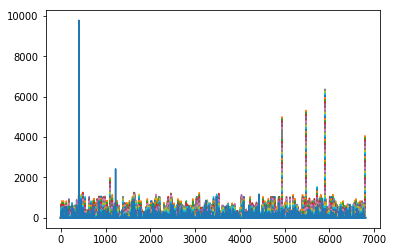

In [6]:
benignware = request_reply_df.loc[request_reply_df["Malicious"] == 0]
benignware.plot(legend=False)

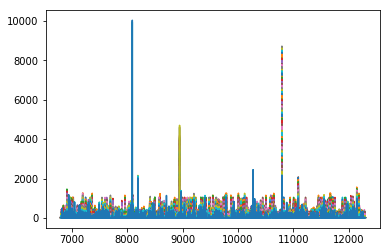

In [7]:
malware = request_reply_df.loc[request_reply_df["Malicious"] == 1]
malware.plot(legend=False)

In [10]:
from prototype_model import *

TypeError: ('dwt() takes from 2 to 4 positional arguments but 5 were given', 'occurred at index 2')

In [ ]:
request_reply_fourier = create_fourier_dataset(request_reply_df)
reply_reply_fourier = create_fourier_dataset(reply_reply_df)
request_reply_cwavelet = create_continuous_wavelet_dataset(request_reply_df)
reply_reply_cwavelet = create_continuous_wavelet_dataset(reply_reply_df)
request_reply_dwavelet = create_discrete_wavelet_dataset(request_reply_df)
reply_reply_dwavelet = create_discrete_wavelet_dataset(reply_reply_df)

In [ ]:
dataset_statistics(request_reply_fourier)

In [ ]:
dataset_statistics(reply_reply_fourier)

In [ ]:
dataset_statistics(request_reply_cwavelet)

In [ ]:
dataset_statistics(reply_reply_cwavelet)

In [11]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

W1121 06:38:56.999552 4649254336 base_layer.py:1772] Layer sequential_2 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/30


W1121 06:38:57.974484 4649254336 deprecation.py:323] From /Users/egalinkin/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


93/93 [==============================] - 3s 32ms/step - loss: 1.2638 - accuracy: 0.5165
Epoch 2/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6903 - accuracy: 0.5521
Epoch 3/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6834 - accuracy: 0.5576
Epoch 4/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6770 - accuracy: 0.5677
Epoch 5/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6728 - accuracy: 0.5668
Epoch 6/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6649 - accuracy: 0.5702
Epoch 7/30
93/93 [==============================] - 1s 13ms/step - loss: 0.6561 - accuracy: 0.5783
Epoch 8/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6473 - accuracy: 0.5908
Epoch 9/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6379 - accuracy: 0.6022
Epoch 10/30
93/93 [==============================] - 1s 12ms/step - loss: 0.6289 - accuracy: 0.6159
Epoch 11/30
93/93 [=

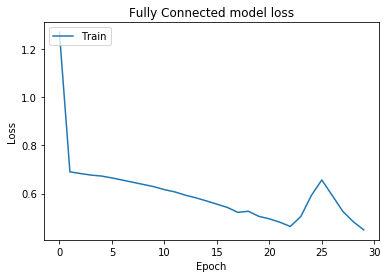

In [12]:
plt.plot(fc_qr_history.history['loss'])
plt.title('Fully Connected model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_2 (DenseFeatu multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  25856     
_________________________________________________________________
dense_11 (Dense)             multiple                  32896     
_________________________________________________________________
dense_12 (Dense)             multiple                  8256      
_________________________________________________________________
dense_13 (Dense)             multiple                  2080      
_________________________________________________________________
dense_14 (Dense)             multiple                  33        
Total params: 69,121
Trainable params: 69,121
Non-trainable params: 0
__________________________________________________

In [11]:
# features = generate_features(reply_reply_df)
# model = build_fc_model(features)
# fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

In [12]:
# plt.plot(fc_rr_history.history['loss'])
# # plt.plot(fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

Epoch 1/30
93/93 [==============================] - 5s 50ms/step - loss: 0.6693 - accuracy: 0.5900
Epoch 2/30
93/93 [==============================] - 3s 32ms/step - loss: 0.6279 - accuracy: 0.6491
Epoch 3/30
93/93 [==============================] - 3s 33ms/step - loss: 0.6060 - accuracy: 0.6765
Epoch 4/30
25/93 [=======>......................] - ETA: 2s - loss: 0.5962 - accuracy: 0.6896

In [ ]:
plt.plot(conv_qr_history.history['loss'])
# plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Convolutional model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# features = generate_features(reply_reply_df)
# model = build_conv_model(features)
# conv_rr_history, conv_rr_results = train_model(model, reply_reply_df)

In [16]:
# plt.plot(conv_rr_history.history['accuracy'])
# # plt.plot(conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
dataset = request_reply_df.copy()
labels = dataset.pop("Malicious")
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=.2, stratify=labels)

In [19]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
predictions = clf.predict(X_test)

In [21]:
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
rf_accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of random forest classifier:" + str(rf_accuracy))

Accuracy of random forest classifier:0.7914634146341464


In [22]:
features = generate_features(request_reply_fourier)
model = build_fc_model(features)
fourier_fc_qr_history, fourier_fc_qr_results = train_model(model, request_reply_fourier)

Epoch 1/30
492/492 [==============================] - 5s 10ms/step - loss: 200.8515 - accuracy: 0.4856
Epoch 2/30
492/492 [==============================] - 3s 5ms/step - loss: 19.5552 - accuracy: 0.5042
Epoch 3/30
492/492 [==============================] - 3s 5ms/step - loss: 9.0468 - accuracy: 0.5016
Epoch 4/30
492/492 [==============================] - 3s 5ms/step - loss: 7.0635 - accuracy: 0.5039
Epoch 5/30
492/492 [==============================] - 3s 5ms/step - loss: 3.8835 - accuracy: 0.5068
Epoch 6/30
492/492 [==============================] - 3s 5ms/step - loss: 2.1463 - accuracy: 0.5058
Epoch 7/30
492/492 [==============================] - 3s 5ms/step - loss: 2.5955 - accuracy: 0.5127
Epoch 8/30
492/492 [==============================] - 3s 5ms/step - loss: 1.8222 - accuracy: 0.5098
Epoch 9/30
492/492 [==============================] - 3s 5ms/step - loss: 2.9368 - accuracy: 0.5123
Epoch 10/30
492/492 [==============================] - 3s 5ms/step - loss: 1.3969 - accuracy: 0.

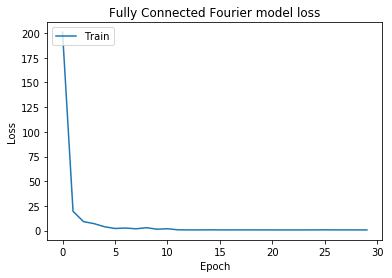

In [23]:
plt.plot(fourier_fc_qr_history.history['loss'])
# plt.plot(fourier_fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [24]:
features = generate_features(request_reply_fourier)
model = build_conv_model(features)
fourier_conv_qr_history, fourier_conv_qr_results = train_model(model, request_reply_fourier)

Epoch 1/30
492/492 [==============================] - 8s 17ms/step - loss: 0.7146 - accuracy: 0.5121
Epoch 2/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6990 - accuracy: 0.5305
Epoch 3/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6937 - accuracy: 0.5376
Epoch 4/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6908 - accuracy: 0.5415
Epoch 5/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6891 - accuracy: 0.5454
Epoch 6/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6894 - accuracy: 0.5450
Epoch 7/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6887 - accuracy: 0.5396
Epoch 8/30
492/492 [==============================] - 6s 13ms/step - loss: 0.6882 - accuracy: 0.5445
Epoch 9/30
492/492 [==============================] - 7s 13ms/step - loss: 0.6897 - accuracy: 0.5448
Epoch 10/30
492/492 [==============================] - 7s 13ms/step - loss: 0.6881 - accura

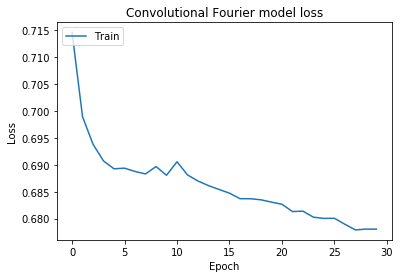

In [25]:
plt.plot(fourier_conv_qr_history.history['loss'])
# plt.plot(fourier_conv_qr_history.history['val_accuracy'])
plt.title('Convolutional Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [26]:
features = generate_features(request_reply_wavelet)
model = build_fc_model(features)
wavelet_fc_qr_history, wavelet_fc_qr_results = train_model(model, request_reply_wavelet)

Epoch 1/30
492/492 [==============================] - 5s 10ms/step - loss: 1.5978 - accuracy: 0.5390
Epoch 2/30
492/492 [==============================] - 3s 5ms/step - loss: 0.7222 - accuracy: 0.6145
Epoch 3/30
492/492 [==============================] - 3s 5ms/step - loss: 0.6356 - accuracy: 0.6599
Epoch 4/30
492/492 [==============================] - 3s 5ms/step - loss: 0.5773 - accuracy: 0.6907
Epoch 5/30
492/492 [==============================] - 3s 6ms/step - loss: 0.5573 - accuracy: 0.7128
Epoch 6/30
492/492 [==============================] - 2s 5ms/step - loss: 0.5487 - accuracy: 0.7252
Epoch 7/30
492/492 [==============================] - 3s 5ms/step - loss: 0.5342 - accuracy: 0.7314
Epoch 8/30
492/492 [==============================] - 2s 5ms/step - loss: 0.5173 - accuracy: 0.7522
Epoch 9/30
492/492 [==============================] - 2s 5ms/step - loss: 0.4883 - accuracy: 0.7669
Epoch 10/30
492/492 [==============================] - 2s 5ms/step - loss: 0.4527 - accuracy: 0.785

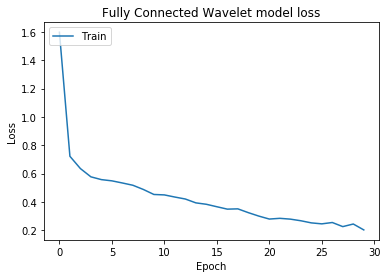

In [27]:
plt.plot(wavelet_fc_qr_history.history['loss'])
plt.title('Fully Connected Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
# features = generate_features(reply_reply_wavelet)
# model = build_fc_model(features)
# wavelet_fc_rr_history, wavelet_fc_rr_results = train_model(model, reply_reply_wavelet)

In [29]:
# plt.plot(wavelet_fc_rr_history.history['accuracy'])
# plt.plot(wavelet_fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [30]:
features = generate_features(request_reply_wavelet)
model = build_conv_model(features)
wavelet_conv_qr_history, wavelet_conv_qr_results = train_model(model, request_reply_wavelet)

W1011 10:49:58.367111 4608886208 base_layer.py:1772] Layer sequential_5 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/30
492/492 [==============================] - 9s 19ms/step - loss: 0.6465 - accuracy: 0.6229
Epoch 2/30
492/492 [==============================] - 7s 14ms/step - loss: 0.6022 - accuracy: 0.6819
Epoch 3/30
492/492 [==============================] - 7s 15ms/step - loss: 0.5793 - accuracy: 0.7011
Epoch 4/30
492/492 [==============================] - 7s 14ms/step - loss: 0.5607 - accuracy: 0.7157
Epoch 5/30
492/492 [==============================] - 7s 14ms/step - loss: 0.5421 - accuracy: 0.7297
Epoch 6/30
492/492 [==============================] - 7s 14ms/step - loss: 0.5248 - accuracy: 0.7426
Epoch 7/30
492/492 [==============================] - 7s 15ms/step - loss: 0.5162 - accuracy: 0.7444
Epoch 8/30
492/492 [==============================] - 7s 14ms/step - loss: 0.5006 - accuracy: 0.7526
Epoch 9/30
492/492 [==============================] - 7s 15ms/step - loss: 0.4887 - accuracy: 0.7624
Epoch 10/30
492/492 [==============================] - 7s 14ms/step - loss: 0.4755 - accura

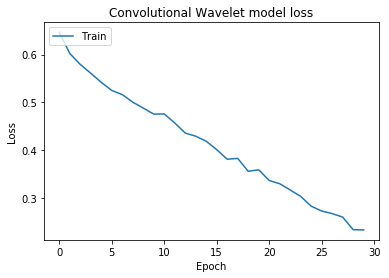

In [31]:
plt.plot(wavelet_conv_qr_history.history['loss'])
plt.title('Convolutional Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
# features = generate_features(reply_reply_wavelet)
# model = build_conv_model(features)
# wavelet_conv_rr_history, wavelet_conv_rr_results = train_model(model, reply_reply_wavelet)

In [33]:
# plt.plot(wavelet_conv_rr_history.history['accuracy'])
# plt.plot(wavelet_conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [34]:
from sklearn.svm import SVC

In [35]:
clf = SVC()
clf.fit(X_train, y_train)

/Users/egalinkin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
predictions = clf.predict(X_test)
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
svm_accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of support vector classifier:" + str(svm_accuracy))

Accuracy of support vector classifier:0.5528455284552846


In [37]:
print("==================================================")
print("=                Overall results                ==")
print("==================================================")
print("    *Request-reply data*")
print("    Fully-Connected test accuracy: {}".format(fc_qr_results[1]))
print("    Convolutional test accuracy: {}".format(conv_qr_results[1]))
print("    Fourier f-c test accuracy: {}".format(fourier_fc_qr_results[1]))
print("    Fourier conv test accuracy: {}".format(fourier_conv_qr_results[1]))
print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_qr_results[1]))
print("    Wavelet conv test accuracy: {}".format(wavelet_conv_qr_results[1]))
# print("    Fourier NN test accuracy: {}").format(fourier_nn_qr_results[1])
# print("    Wavelet NN test accuracy: {}").formaat(wavelet_nn_qr_results[1])
print("    Random Forest (control 1) test accuracy: {}".format(rf_accuracy))
print("    Support Vector Machine (control 2) test accuracy: {}".format(svm_accuracy))
# print("    *Reply-reply data*")
# print("    Fully-Connected test accuracy: {}".format(fc_rr_results[1]))
# print("    Convolutional test accuracy: {}".format(conv_rr_results[1]))
# print("    Fourier f-c test accuracy: {}".format(fourier_fc_rr_results[1]))
# print("    Fourier conv test accuracy: {}".format(fourier_conv_rr_results[1]))
# print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_rr_results[1]))
# print("    Wavelet conv test accuracy: {}".format(wavelet_conv_rr_results[1]))

=                Overall results                ==
    *Request-reply data*
    Fully-Connected test accuracy: 0.6646341681480408
    Convolutional test accuracy: 0.7272357940673828
    Fourier f-c test accuracy: 0.5524390339851379
    Fourier conv test accuracy: 0.4247967600822449
    Wavelet f-c test accuracy: 0.637398362159729
    Wavelet conv test accuracy: 0.6947154402732849
    Random Forest (control 1) test accuracy: 0.7914634146341464
    Support Vector Machine (control 2) test accuracy: 0.5528455284552846
